# Exercises chapter 3

## Exercise 1

Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X, y = mnist.data, mnist.target
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

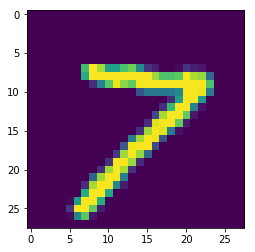

In [4]:
plt.imshow(X_train[np.random.choice(60000, size=1)].reshape(28, 28))

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin

class ManualScaler(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X / 255.

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

preprocess = Pipeline(steps=[
    ('scale', MinMaxScaler())
])

full_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', KNeighborsClassifier(n_neighbors=3, weights='uniform'))
])

In [21]:
param_grid = dict(classifier__n_neighbors=[3, 5])

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

grid_search = GridSearchCV(full_pipeline, param_grid=param_grid, n_jobs=2, cv=5, verbose=2)